In [14]:
#!http://benalexkeen.com/bucketing-continuous-variables-in-pandas/

In [15]:
import pandas as pd
import numpy as np

np.random.seed(10)
df = pd.DataFrame({
    'normal': np.random.normal(10, 3, 1000),
    'chi': np.random.chisquare(4, 1000)
})

In [16]:
pd.cut(df['normal'], 8)

0       (13.626, 15.833]
1        (11.42, 13.626]
2         (4.8, 7.00665]
3         (9.213, 11.42]
4        (11.42, 13.626]
5       (7.00665, 9.213]
6         (9.213, 11.42]
7         (9.213, 11.42]
8         (9.213, 11.42]
9         (9.213, 11.42]
10        (9.213, 11.42]
11       (11.42, 13.626]
12      (7.00665, 9.213]
13       (11.42, 13.626]
14        (9.213, 11.42]
15        (9.213, 11.42]
16        (4.8, 7.00665]
17        (9.213, 11.42]
18      (13.626, 15.833]
19        (4.8, 7.00665]
20          (2.593, 4.8]
21          (2.593, 4.8]
22        (9.213, 11.42]
23     (15.833, 18.0397]
24       (11.42, 13.626]
25      (13.626, 15.833]
26        (9.213, 11.42]
27      (13.626, 15.833]
28      (7.00665, 9.213]
29       (11.42, 13.626]
             ...        
970     (7.00665, 9.213]
971     (7.00665, 9.213]
972       (9.213, 11.42]
973      (11.42, 13.626]
974     (7.00665, 9.213]
975       (9.213, 11.42]
976       (9.213, 11.42]
977     (7.00665, 9.213]
978         (2.593, 4.8]


In [17]:
pd.cut(df['chi'], 8).head()

0    (8.645, 10.784]
1     (2.229, 4.368]
2     (6.507, 8.645]
3     (4.368, 6.507]
4     (2.229, 4.368]
Name: chi, dtype: category
Categories (8, object): [(0.0738, 2.229] < (2.229, 4.368] < (4.368, 6.507] < (6.507, 8.645] < (8.645, 10.784] < (10.784, 12.922] < (12.922, 15.0607] < (15.0607, 17.199]]

In [18]:
custom_bucket_array = np.linspace(0, 20, 9)
custom_bucket_array

array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ])

In [19]:
df['normal'] = pd.cut(df['normal'], custom_bucket_array)
df['chi'] = pd.cut(df['chi'], custom_bucket_array)
df.head()

,chi,normal
0,"(7.5, 10]","(12.5, 15]"
1,"(2.5, 5]","(10, 12.5]"
2,"(5, 7.5]","(5, 7.5]"
3,"(5, 7.5]","(7.5, 10]"
4,"(2.5, 5]","(10, 12.5]"


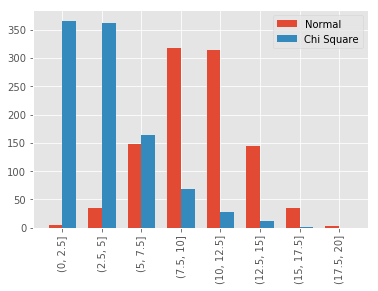

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

a = df.groupby('normal').size()
b = df.groupby('chi').size()

categories = df['normal'].cat.categories
ind = np.array([x for x, _ in enumerate(categories)])
width = 0.35       
plt.bar(ind, a, width, label='Normal')
plt.bar(ind + width, b, width,
    label='Chi Square')

plt.xticks(ind + width / 2, categories)
plt.legend(loc='best')
plt.xticks(rotation = 90)
plt.show()